In [351]:
import numpy as np
import sympy as sp

In [353]:
x = sp.Symbol('x')

In [355]:
def f(x):
    return 0.37*pow(x, 5)-0.86*pow(x, 4)-0.72*pow(x, 3)+2.7*pow(x, 2)-8.3*x-10.9

In [357]:
def phi(x):
    return (f(x)/8.3)+x

In [359]:
def phi_diff(x):
    return sp.diff(phi(x), x)

In [361]:
def check_convergence(x0):
    derivative = phi_diff(x)
    derivative_at_x0 = derivative.subs(x, x0)
    return abs(derivative_at_x0) < 1

In [363]:
def simple_iteration(x0, eps = 1e-5, max_iter=100):
    if not check_convergence(x0):
        print("Метод не будет сходиться при этом начальном приближении.")
        return None 
    iterations = [x0] 
    x_new = x0
    for i in range(max_iter):
        x_old = x_new
        x_new = phi(x_old)
        iterations.append(x_new)
        if np.abs(x_new - x_old) < eps:
            print(f"Корень найден: {x_new: .5f} за {i+1} итераций")
            return iterations, x_new
    print("Не удалось найти корень за заданное количество итераций")
    return iterations, None

In [365]:
x0 = -1.02
iterations, root = simple_iteration(x0)

Корень найден: -1.03942 за 7 итераций


### Визуализация 

In [368]:
import plotly.graph_objects as go

In [370]:
fig = go.Figure()
x_vals = np.linspace(-2, 0, 100)  
f_vals = [f(v) for v in x_vals]
phi_vals = [phi(v) for v in x_vals]

In [372]:
def plot_iterations(iterations, x0):
    x_vals = np.linspace(-1.045, -1.02, 400) 
    f_vals = [f(v) for v in x_vals]
    phi_vals = [phi(v) for v in x_vals]
    
    fig = go.Figure()
    
    fig.add_trace(go.Scatter(x=x_vals, y=phi_vals, mode='lines', name='phi(x)', line=dict(color='orange')))

    iterations_y = [phi(v) for v in iterations]
    fig.add_trace(go.Scatter(x=iterations, y=iterations_y, mode='markers+lines', name='Итерации', marker=dict(color='gray', size=10)))

    iterations_y = [v for v in iterations]
    fig.add_trace(go.Scatter(x=iterations, y=iterations_y, mode='markers+lines', name='Итерации', marker=dict(color='blue', size=10)))

    fig.add_trace(go.Scatter(x=x_vals, y=x_vals, mode='lines', name='x', marker=dict(color='green', size=10)))

    fig.add_trace(go.Scatter(x=[x0], y=[x0], mode='markers', name='x0', marker=dict(color='red', symbol='x', size=12)))

    fig.update_layout(title='Метод простых итераций',
                      xaxis_title='x',
                      yaxis_title='y',
                      showlegend=True)
    
    fig.show()

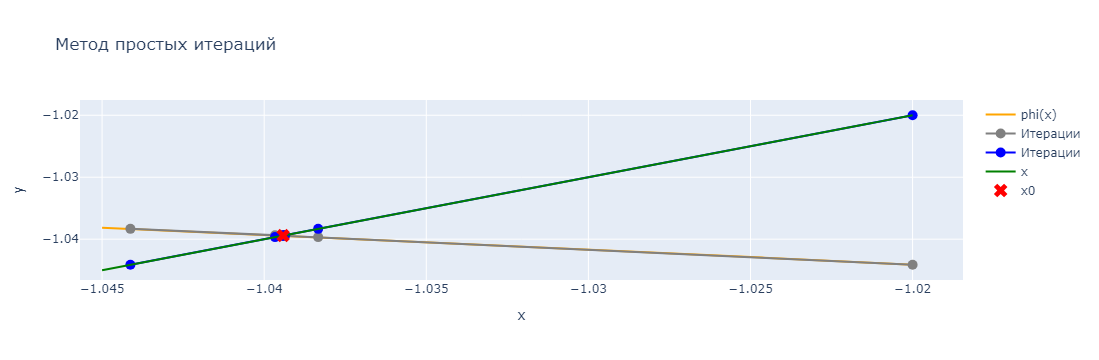

In [374]:
plot_iterations(iterations, root)